In [2]:
import pandas as pd
def extract_and_sort_sto_data(file_path, start_time, end_time, output_file):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    header_lines = lines[:10]
    df = pd.read_csv(file_path, delim_whitespace=True, comment='%', skiprows=10)
    if 'time' not in df.columns:
        raise ValueError("The .sto file does not contain a 'time' column.")
    df_filtered = df[(df['time'] >= start_time) & (df['time'] <= end_time)]
    df_sorted = df_filtered.sort_values(by='time').reset_index(drop=True)
    original_time_diff = df_sorted['time'].diff().dropna().mean()
    df_sorted['time'] = (1/30) + df_sorted.index * original_time_diff
    df_sorted['time'] = df_sorted['time'].round(6)
    with open(output_file, 'w') as f_out:
        f_out.writelines(header_lines)
        df_sorted.to_csv(f_out, index=False, sep='\t', lineterminator='\n')

file_path = 'C:/Users/sean9/Desktop/ExoskeletonPowerAsistance/simulation/CEINMS/output/Kinematics_q.sto'
start_time = 12.066667
end_time = 16.766667
output_file = 'C:/Users/sean9/Desktop/ExoskeletonPowerAsistance/simulation/CEINMS/output/Kinematics_cut.sto'

extract_and_sort_sto_data(file_path, start_time, end_time, output_file)

C:\Users\sean9\AppData\Local\Temp\ipykernel_3516\889125475.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, comment='%', skiprows=10)


       time  pelvis_tilt  pelvis_tx  pelvis_ty  hip_flexion_r  knee_angle_r  \
0  0.033333    -0.451685  -2.698267   0.858674       0.280526     -0.298909   
1  0.066667    -0.441131  -2.673311   0.860783       0.279819     -0.370559   
2  0.100000    -0.424094  -2.647836   0.864914       0.291678     -0.474047   
3  0.133333    -0.401422  -2.622492   0.870519       0.320398     -0.607494   
4  0.166667    -0.378103  -2.597860   0.876454       0.370033     -0.756641   

   ankle_angle_r  hip_flexion_l  knee_angle_l  ankle_angle_l  lumbar_extension  
0       0.370424       0.942692     -0.493727       0.088605          0.369186  
1       0.326933       0.913308     -0.517801       0.131419          0.349300  
2       0.256182       0.867989     -0.530143       0.170990          0.321919  
3       0.148827       0.809962     -0.531022       0.205313          0.289213  
4       0.007706       0.748548     -0.525029       0.233541          0.256933  


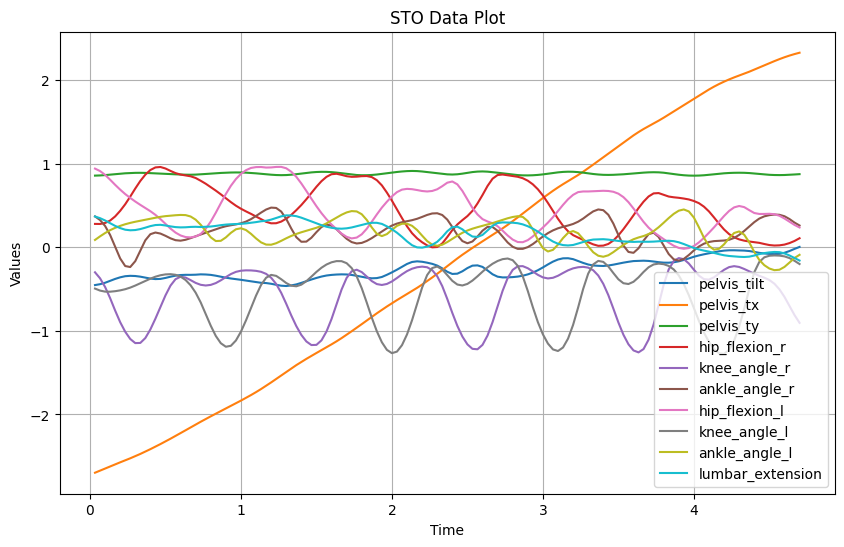

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

sto_file_path = 'C:/Users/sean9/Desktop/ExoskeletonPowerAsistance/simulation/CEINMS/output/Kinematics_cut.sto'

sto_data = pd.read_csv(sto_file_path, delimiter='\t', skiprows=10)

print(sto_data.head())

sto_data.plot(x='time', figsize=(10, 6))

plt.title('STO Data Plot')
plt.xlabel('Time')
plt.ylabel('Values')
plt.grid(True)
plt.show()